# Vorbereitung 
Laden und importieren aller notwendigen Bibliotheken und Funktionen 

In [1]:
# Gradient Boosting Model in Jupyter Notebook
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')

# Using KFold cross validation
from sklearn.model_selection import KFold

# Encoding categorical features
from sklearn.preprocessing import LabelEncoder

# Scikit-Learn Machine Learning models
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Timing utility
from timeit import default_timer as timer


# Laden des Datensatzes
Herunterladen des kombinierten Datensatzes und behandeln möglicher fehlenden Werte

In [2]:
prices_df= pd.read_csv('/workspaces/codespaces-jupyter/Daten komplett.csv')

# Anzeigen eines Auschnittes der Daten 
Visualisierung der Variablenamen 

In [3]:
# Übersicht der Variablen im Datensatz
print(prices_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  115 non-null    object 
 1   Day-ahead Total Load Forecast [MW]    115 non-null    float64
 2   Actual Total Load [MW]                115 non-null    float64
 3   Solar Generation (MW)                 115 non-null    float64
 4   Solar hours (h)                       115 non-null    float64
 5   Solar Prognose (Day-Ahead D-1 18:00)  115 non-null    float64
 6   Solar_diff                            115 non-null    float64
 7   Solar_Prognose_d                      115 non-null    float64
 8   Monthly_Avg_Price                     115 non-null    float64
 9   Price (EUR/MWhe)                      115 non-null    float64
dtypes: float64(9), object(1)
memory usage: 9.1+ KB
None


In [4]:
print(prices_df.head)

<bound method NDFrame.head of               Date  Day-ahead Total Load Forecast [MW]  \
0     January 2015                         166302682.0   
1    February 2015                         155342139.0   
2       March 2015                         169030231.0   
3       April 2015                         154113340.0   
4         May 2015                         151195903.0   
..             ...                                 ...   
110     March 2024                         159348281.0   
111     April 2024                         150003318.0   
112       May 2024                         149199298.0   
113      June 2024                         146887657.0   
114      July 2024                         151822977.0   

     Actual Total Load [MW]  Solar Generation (MW)  Solar hours (h)  \
0               181834199.0              2238694.0             35.3   
1               169561960.0              5484017.0             88.0   
2               178454891.0             11434309.0          

# Konvertieren der Variable-Art
für das Gradientboosting-Modell werden die Daten, insb. die Datumsvariable angepasst
dazu muss die Variable-Art überprüft werden 


In [5]:
# Überprüfen, welche Spalten Strings enthalten
print(prices_df.dtypes)

Date                                     object
Day-ahead Total Load Forecast [MW]      float64
Actual Total Load [MW]                  float64
Solar Generation (MW)                   float64
Solar hours (h)                         float64
Solar Prognose (Day-Ahead D-1 18:00)    float64
Solar_diff                              float64
Solar_Prognose_d                        float64
Monthly_Avg_Price                       float64
Price (EUR/MWhe)                        float64
dtype: object


In [6]:
date = prices_df["Date"].to_numpy()
date = pd.to_datetime(date, format='%B %Y').to_numpy()
FC_load = prices_df["Day-ahead Total Load Forecast [MW]"].to_numpy()
ACT_load = prices_df["Actual Total Load [MW]"].to_numpy()
Solar_generation = prices_df["Solar Generation (MW)"].to_numpy()
Sonnenstunden = prices_df["Solar hours (h)"].to_numpy()
FC_Solar_generation = prices_df["Solar Prognose (Day-Ahead D-1 18:00)"].to_numpy()
FC_Rest = prices_df["Solar_diff"].to_numpy()
Durchschnittspreise = prices_df["Price (EUR/MWhe)"].to_numpy()


In [7]:
date

array(['2015-01-01T00:00:00.000000000', '2015-02-01T00:00:00.000000000',
       '2015-03-01T00:00:00.000000000', '2015-04-01T00:00:00.000000000',
       '2015-05-01T00:00:00.000000000', '2015-06-01T00:00:00.000000000',
       '2015-07-01T00:00:00.000000000', '2015-08-01T00:00:00.000000000',
       '2015-09-01T00:00:00.000000000', '2015-10-01T00:00:00.000000000',
       '2015-11-01T00:00:00.000000000', '2015-12-01T00:00:00.000000000',
       '2016-01-01T00:00:00.000000000', '2016-02-01T00:00:00.000000000',
       '2016-03-01T00:00:00.000000000', '2016-04-01T00:00:00.000000000',
       '2016-05-01T00:00:00.000000000', '2016-06-01T00:00:00.000000000',
       '2016-07-01T00:00:00.000000000', '2016-08-01T00:00:00.000000000',
       '2016-09-01T00:00:00.000000000', '2016-10-01T00:00:00.000000000',
       '2016-11-01T00:00:00.000000000', '2016-12-01T00:00:00.000000000',
       '2017-01-01T00:00:00.000000000', '2017-02-01T00:00:00.000000000',
       '2017-03-01T00:00:00.000000000', '2017-04-01

In [8]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
## Convert the date column 
#prices_df['Date'] = pd.to_datetime(prices_df['Date'], format='%B %Y')  # Example format 'August 2017'

# Extract year and month as new columns
#prices_df['year'] = prices_df['Date'].dt.year
# prices_df['month'] = prices_df['Date'].dt.month

In [9]:
# Extrahiere Jahr und Monat
date = pd.Series(date)
years = date.dt.year.tolist()
months = date.dt.month.tolist()
prices_df['year'] = years
prices_df['month'] = months

In [10]:
print(len(years))
print(len(months))
print(Durchschnittspreise.shape)

115
115
(115,)


In [11]:
print (prices_df.head)

<bound method NDFrame.head of               Date  Day-ahead Total Load Forecast [MW]  \
0     January 2015                         166302682.0   
1    February 2015                         155342139.0   
2       March 2015                         169030231.0   
3       April 2015                         154113340.0   
4         May 2015                         151195903.0   
..             ...                                 ...   
110     March 2024                         159348281.0   
111     April 2024                         150003318.0   
112       May 2024                         149199298.0   
113      June 2024                         146887657.0   
114      July 2024                         151822977.0   

     Actual Total Load [MW]  Solar Generation (MW)  Solar hours (h)  \
0               181834199.0              2238694.0             35.3   
1               169561960.0              5484017.0             88.0   
2               178454891.0             11434309.0          

# 1. Gradientboosting-Modell
erstellen eines Gradientboosting-Modells mit den Variablen x= Solar hours (h) und y= Price (EUR/MWhe)
testsize: 0,2

Features und Zielvariablen bennenen und das Modell trainieren 

In [12]:
import matplotlib.pyplot as plt


In [13]:
# dataframe
data = {
    'year': years,  # etc.
    'month': months,
    'FC_load': FC_load,
    'ACT_load': ACT_load,
    'Solar_generation': Solar_generation,
    'Sonnenstunden': Sonnenstunden,
    'FC_Solar_generation': FC_Solar_generation,
    'FC_Rest': FC_Rest,
    'y_value': Durchschnittspreise  # Zielwerte
}

prices_df = pd.DataFrame(data)

Erstellen des Grundmodells für Gradientboosting (testsize=0,2, random_state=42)

In [14]:
# Features und Zielvariable
X = prices_df[['year', 'month', 'FC_load', 'ACT_load', 'Solar_generation', 'Sonnenstunden', 'FC_Solar_generation', 'FC_Rest']]
y = prices_df['y_value']

# Aufteilen der Daten in Trainings- und Testdatensätze
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Erstellen des Gradient Boosting Modells
model = GradientBoostingRegressor()

# Parameter
params = {
    'objective': 'reg:squarederror',  # Für Regression
    'max_depth': 4,
    'learning_rate': 0.1
}

# Trainieren des Modells
model.fit(X_train, y_train)

# Vorhersagen für Trainings- und Testdaten
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Die abhängige Variable ist 'Price (EUR/MWhe)', die in der y-Variable gespeichert ist.

Überprüfen der Modell-Güte 

In [15]:
# Berechnen des Mean Squared Error
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Berechnen des R-Quadrat
r2_score_train = model.score(X_train, y_train)
r2_score_test = model.score(X_test, y_test)

print(f'Mean Squared Error (Trainingsdaten): {mse_train}')
print(f'Mean Squared Error (Testdaten): {mse_test}')
print(f'R-Quadrat (Trainingsdaten): {r2_score_train}')
print(f'R-Quadrat (Testdaten): {r2_score_test}')

Mean Squared Error (Trainingsdaten): 7.985860631973904
Mean Squared Error (Testdaten): 214.5554771617803
R-Quadrat (Trainingsdaten): 0.998666846137413
R-Quadrat (Testdaten): 0.8877770139791108


Testdaten visuell darstellen 

In [16]:
# Plot
def sort_data(df):
    return df.sort_values(by=['year', 'month'])

train_sorted = sort_data(pd.DataFrame({
    'year': X_train['year'].values,
    'month': X_train['month'].values,
    'y_value': y_train.values,
    'preds': y_pred_train
}))

test_sorted = sort_data(pd.DataFrame({
    'year': X_test['year'].values,
    'month': X_test['month'].values,
    'y_value': y_test.values,
    'preds': y_pred_test
}))


In [17]:
print(test_sorted)

    year  month     y_value       preds
15  2015      1   31.679677   46.425580
1   2015      5   25.329677   25.748832
4   2015     11   32.381333   41.193718
9   2015     12   27.786129   36.802476
22  2016      1   29.025806   35.444795
14  2016      7   27.181290   34.897795
17  2017      3   31.692581   28.292551
11  2018      1   29.501613   63.820459
2   2018      5   33.658387   45.476218
5   2018     10   53.082258   40.540503
8   2018     12   48.110323   37.364112
19  2019      6   32.504667   32.368065
7   2020      7   30.074839   29.033028
3   2020     10   33.954839   34.791027
6   2020     11   38.796000   37.256868
16  2021      1   52.792581   99.749692
0   2021     10  139.543226  118.203336
12  2022      1  167.874839  172.872839
20  2022     11  175.447333  177.836251
10  2023      5   81.647419   75.639110
18  2023     10   87.316452   97.186686
21  2024      5   67.284516   67.460883
13  2024      6   72.890000   67.703065


In [18]:
print(train_sorted)

    year  month    y_value      preds
72  2015      2  36.694643  34.837882
75  2015      3  31.297742  28.611655
41  2015      4  29.778333  28.298549
17  2015      6  30.109000  29.792956
45  2015      7  34.979032  36.528497
..   ...    ...        ...        ...
6   2024      1  76.635484  76.202727
3   2024      2  61.356552  64.428536
23  2024      3  64.664194  66.756838
55  2024      4  62.393000  63.585206
83  2024      7  67.710323  66.838392

[92 rows x 4 columns]


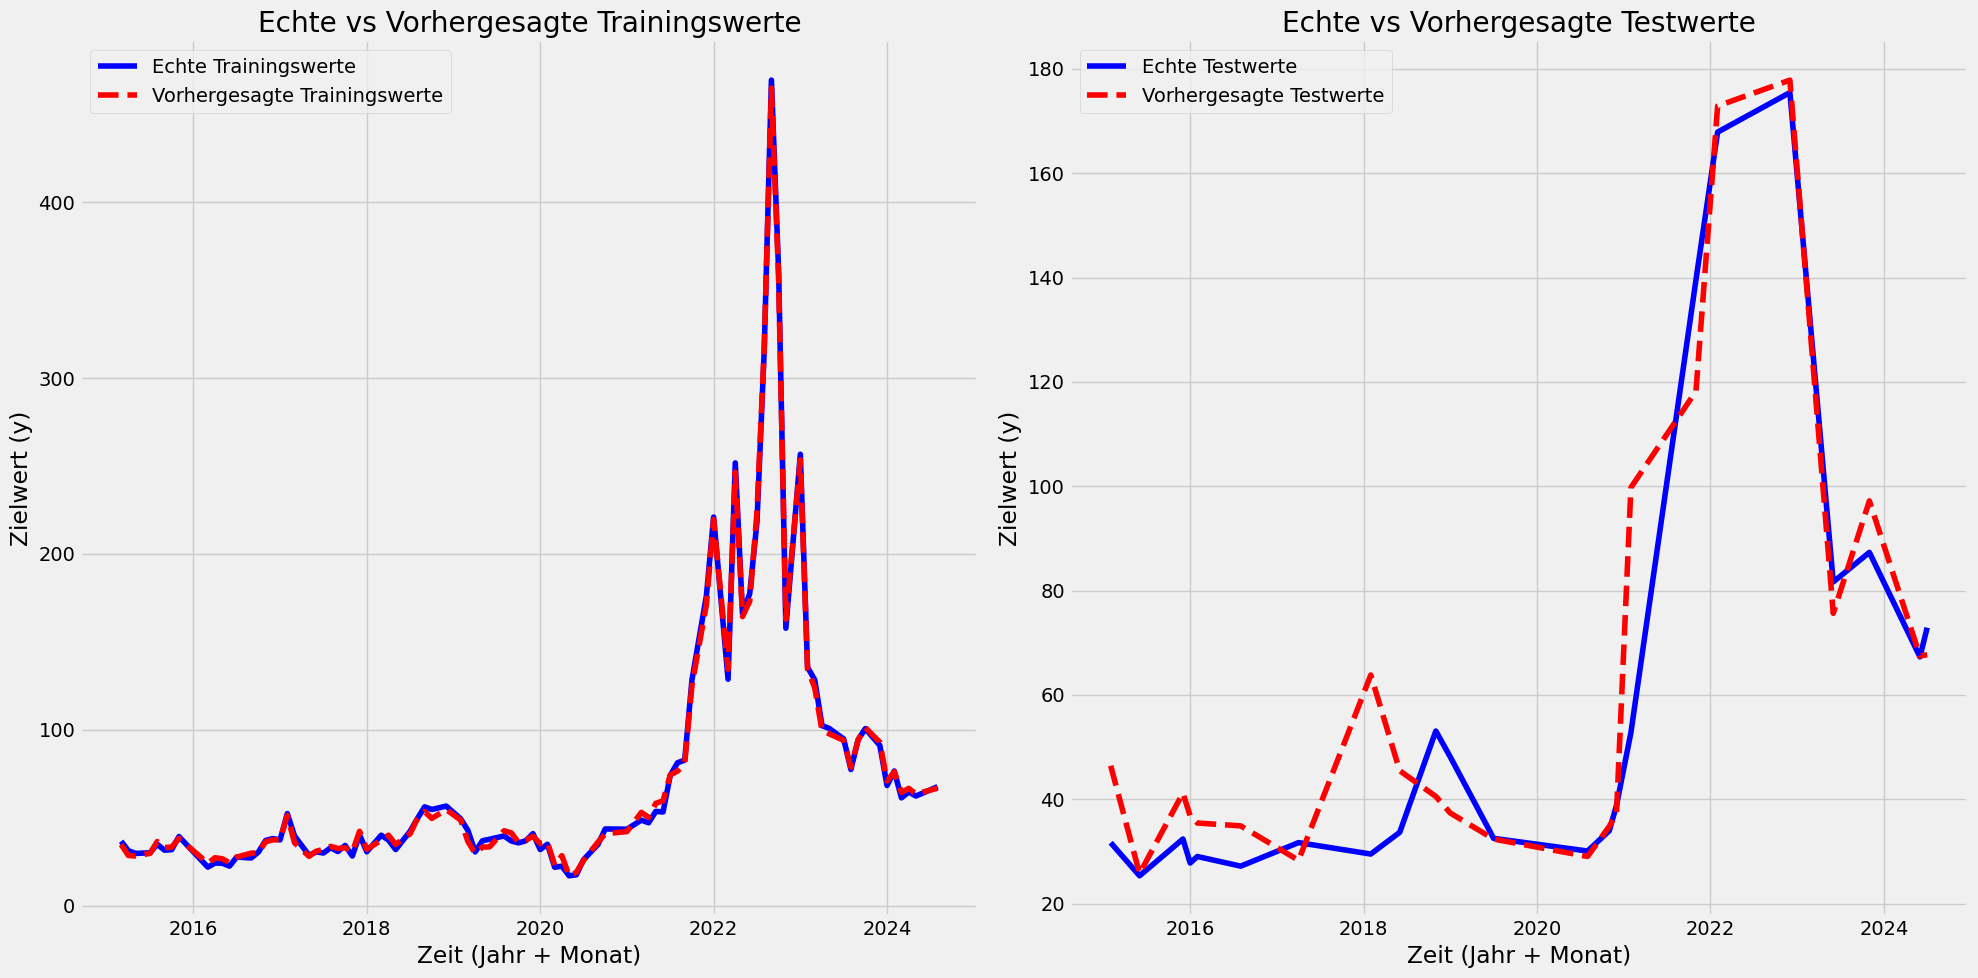

In [19]:
plt.figure(figsize=(20, 10))
# Trainingsdaten plotten
plt.subplot(1, 2, 1)
plt.plot(train_sorted['year'] + train_sorted['month']/12, train_sorted['y_value'], label='Echte Trainingswerte', color='blue')
plt.plot(train_sorted['year'] + train_sorted['month']/12, train_sorted['preds'], label='Vorhergesagte Trainingswerte', linestyle='--', color='red')
plt.xlabel('Zeit (Jahr + Monat)')
plt.ylabel('Zielwert (y)')
plt.title('Echte vs Vorhergesagte Trainingswerte')
plt.legend()
plt.grid(True)

# Testdaten plotten
plt.subplot(1, 2, 2)
plt.plot(test_sorted['year'] + test_sorted['month']/12, test_sorted['y_value'], label='Echte Testwerte', color='blue')
plt.plot(test_sorted['year'] + test_sorted['month']/12, test_sorted['preds'], label='Vorhergesagte Testwerte', linestyle='--', color='red')
plt.xlabel('Zeit (Jahr + Monat)')
plt.ylabel('Zielwert (y)')
plt.title('Echte vs Vorhergesagte Testwerte')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 2. Gradientboosting Modell 
test_size=0,1, random_state=100

In [20]:
# Aufteilen der Daten in Trainings- und Testdatensätze
X = prices_df[['year', 'month', 'FC_load', 'ACT_load', 'Solar_generation', 'Sonnenstunden', 'FC_Solar_generation', 'FC_Rest']]
y = prices_df['y_value']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=100)

# Erstellen des Gradient Boosting Modells
model = GradientBoostingRegressor()

# Trainieren des Modells
model.fit(X_train, y_train)

# Vorhersagen für Trainings- und Testdaten
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

Überprüfen der Modellgüte

In [21]:
# Berechnen des Mean Squared Error
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Berechnen des R-Quadrat
r2_score_train = model.score(X_train, y_train)
r2_score_test = model.score(X_test, y_test)

print(f'Mean Squared Error (Trainingsdaten): {mse_train}')
print(f'Mean Squared Error (Testdaten): {mse_test}')
print(f'R-Quadrat (Trainingsdaten): {r2_score_train}')
print(f'R-Quadrat (Testdaten): {r2_score_test}')

Mean Squared Error (Trainingsdaten): 7.861013743464455
Mean Squared Error (Testdaten): 1082.1983059586273
R-Quadrat (Trainingsdaten): 0.9984988070692565
R-Quadrat (Testdaten): 0.7815698201790142


In [22]:
# Plot
def sort_data2(df):
    return df.sort_values(by=['year', 'month'])

train_sorted2 = sort_data2(pd.DataFrame({
    'year': X_train['year'].values,
    'month': X_train['month'].values,
    'y_value': y_train.values,
    'preds': y_pred_train
}))

test_sorted2 = sort_data2(pd.DataFrame({
    'year': X_test['year'].values,
    'month': X_test['month'].values,
    'y_value': y_test.values,
    'preds': y_pred_test
}))

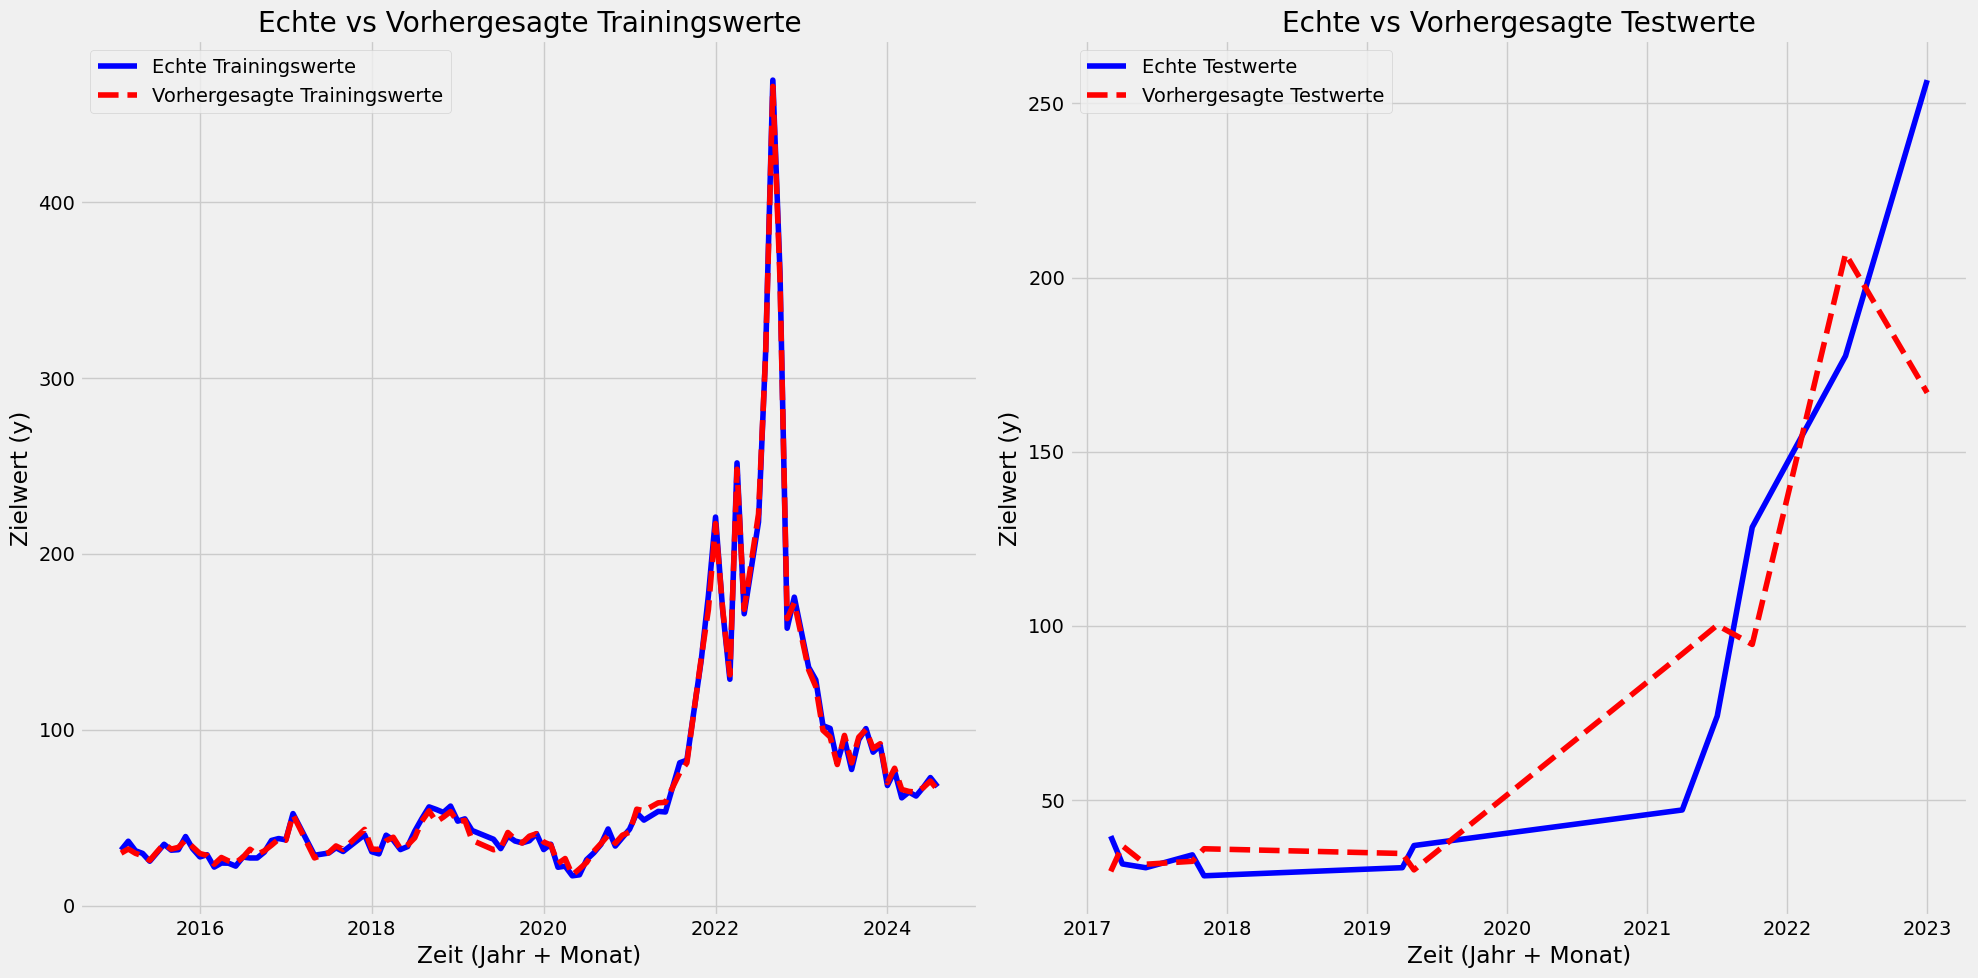

In [23]:
plt.figure(figsize=(20, 10))
# Trainingsdaten plotten
plt.subplot(1, 2, 1)
plt.plot(train_sorted2['year'] + train_sorted2['month']/12, train_sorted2['y_value'], label='Echte Trainingswerte', color='blue')
plt.plot(train_sorted2['year'] + train_sorted2['month']/12, train_sorted2['preds'], label='Vorhergesagte Trainingswerte', linestyle='--', color='red')
plt.xlabel('Zeit (Jahr + Monat)')
plt.ylabel('Zielwert (y)')
plt.title('Echte vs Vorhergesagte Trainingswerte')
plt.legend()
plt.grid(True)

# Testdaten plotten
plt.subplot(1, 2, 2)
plt.plot(test_sorted2['year'] + test_sorted2['month']/12, test_sorted2['y_value'], label='Echte Testwerte', color='blue')
plt.plot(test_sorted2['year'] + test_sorted2['month']/12, test_sorted2['preds'], label='Vorhergesagte Testwerte', linestyle='--', color='red')
plt.xlabel('Zeit (Jahr + Monat)')
plt.ylabel('Zielwert (y)')
plt.title('Echte vs Vorhergesagte Testwerte')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

10% Trainingsdaten sind zu gering um das Modell ausreichend zu trainieren, die Vorhersage für die Testdaten ist schlechter als bei 20% Trainingsdaten 

# Hyperparameter-Raster über Gridsearch 

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
# X und Y definieren 

X = prices_df[['year', 'month', 'FC_load', 'ACT_load', 'Solar_generation', 'Sonnenstunden', 'FC_Solar_generation', 'FC_Rest']]
y = prices_df['y_value']

# Daten in Trainings- und Testdatensatz aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting Modell 
model= GradientBoostingRegressor()


In [26]:
# Hyperparameter-Raster
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [27]:
# GridSearchCV erstellen
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2', return_train_score=True)

# GridSearchCV fitten
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='r2')

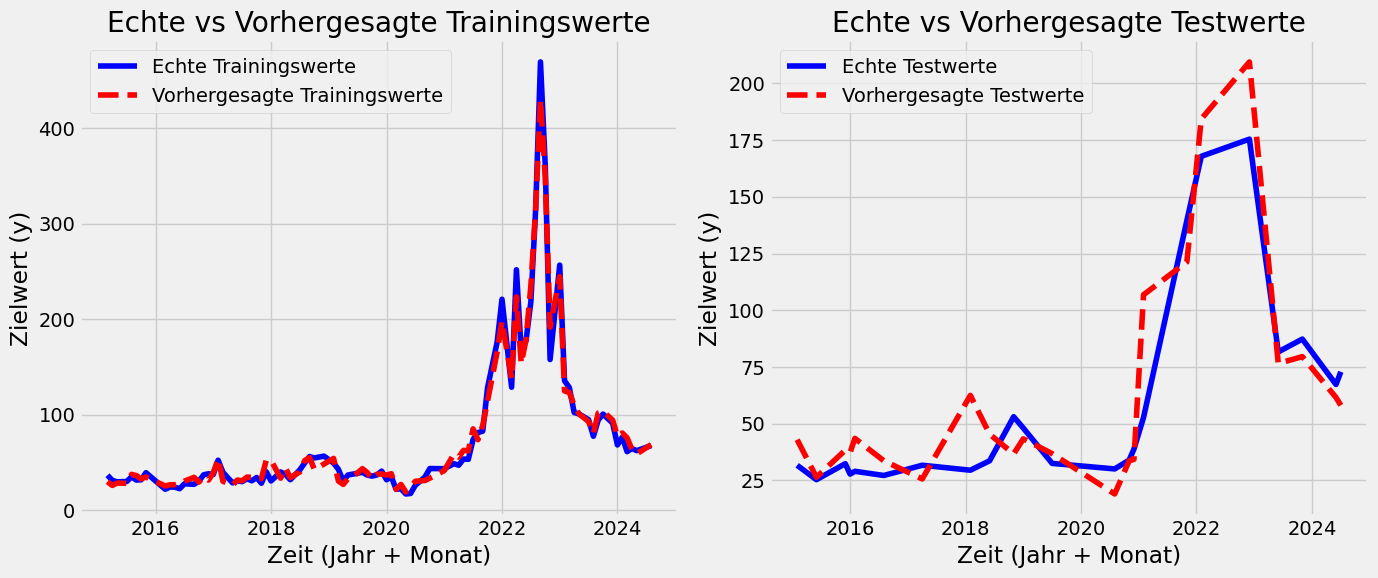

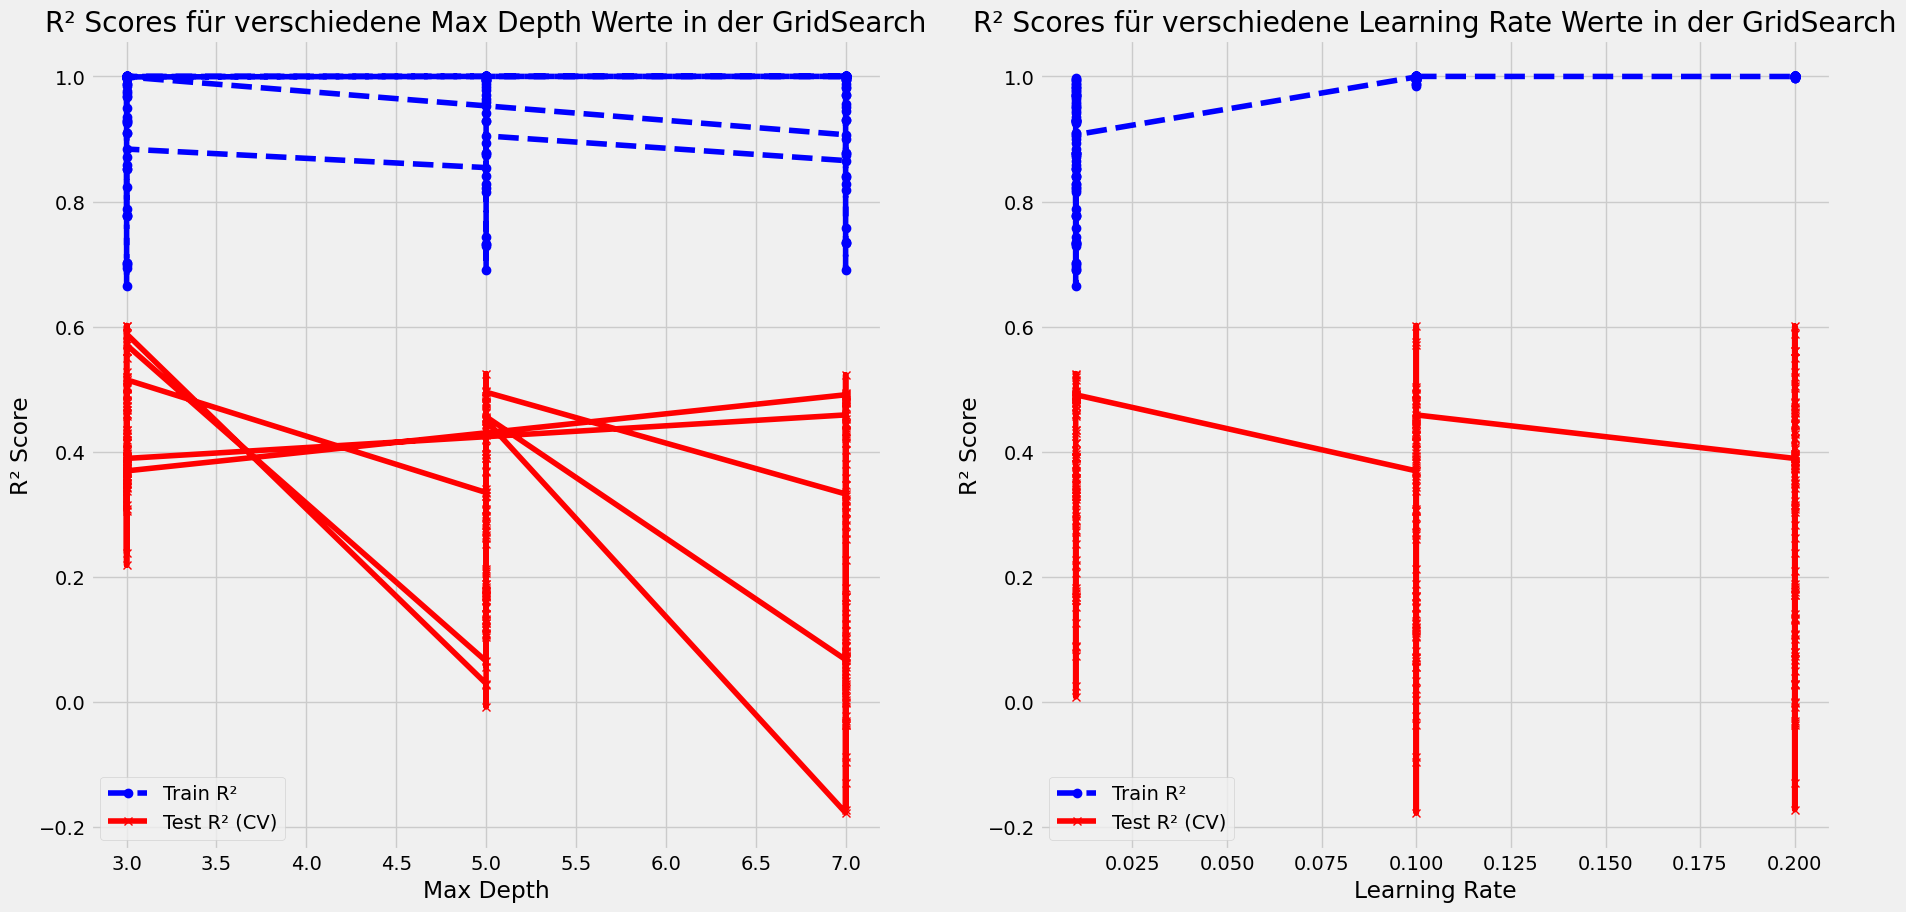

<Figure size 640x480 with 0 Axes>

In [28]:
# Ergebnisse des GridSearch abrufen und in einem DataFrame speichern
results = pd.DataFrame(grid_search.cv_results_)

# Sortiere die Daten nach Jahr und Monat für saubere Plots
def sort_data(df):
    return df.sort_values(by=['year', 'month'])

# Trainingsergebnisse plotten
train_preds = grid_search.best_estimator_.predict(X_train)
train_sorted = sort_data(pd.DataFrame({
    'year': X_train['year'],
    'month': X_train['month'],
    'y_value': y_train,
    'preds': train_preds
}))

# Testergebnisse plotten
test_preds = grid_search.best_estimator_.predict(X_test)
test_sorted = sort_data(pd.DataFrame({
    'year': X_test['year'],
    'month': X_test['month'],
    'y_value': y_test,
    'preds': test_preds
}))

# Plotten der echten Werte und Vorhersagen für Trainings- und Testdaten
plt.figure(figsize=(14, 6))

# Plot für Trainingsdaten
plt.subplot(1, 2, 1)
plt.plot(train_sorted['year'] + train_sorted['month']/12, train_sorted['y_value'], label='Echte Trainingswerte', color='blue')
plt.plot(train_sorted['year'] + train_sorted['month']/12, train_sorted['preds'], label='Vorhergesagte Trainingswerte', linestyle='--', color='red')
plt.xlabel('Zeit (Jahr + Monat)')
plt.ylabel('Zielwert (y)')
plt.title('Echte vs Vorhergesagte Trainingswerte')
plt.legend()
plt.grid(True)

# Plot für Testdaten
plt.subplot(1, 2, 2)
plt.plot(test_sorted['year'] + test_sorted['month']/12, test_sorted['y_value'], label='Echte Testwerte', color='blue')
plt.plot(test_sorted['year'] + test_sorted['month']/12, test_sorted['preds'], label='Vorhergesagte Testwerte', linestyle='--', color='red')
plt.xlabel('Zeit (Jahr + Monat)')
plt.ylabel('Zielwert (y)')
plt.title('Echte vs Vorhergesagte Testwerte')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Plot der Trainings- und Test-R²-Werte für verschiedene Hyperparameter
plt.figure(figsize=(20, 10))

# Plot für max_depth
plt.subplot(1, 2, 1)
plt.plot(results['param_max_depth'], results['mean_train_score'], label='Train R²', marker='o', linestyle='--', color='blue')
plt.plot(results['param_max_depth'], results['mean_test_score'], label='Test R² (CV)', marker='x', linestyle='-', color='red')
plt.xlabel('Max Depth')
plt.ylabel('R² Score')
plt.title('R² Scores für verschiedene Max Depth Werte in der GridSearch')
plt.legend()
plt.grid(True)

# Plot für learning_rate
plt.subplot(1, 2, 2)
plt.plot(results['param_learning_rate'], results['mean_train_score'], label='Train R²', marker='o', linestyle='--', color='blue')
plt.plot(results['param_learning_rate'], results['mean_test_score'], label='Test R² (CV)', marker='x', linestyle='-', color='red')
plt.xlabel('Learning Rate')
plt.ylabel('R² Score')
plt.title('R² Scores für verschiedene Learning Rate Werte in der GridSearch')
plt.legend()
plt.grid(True)

plt.show()

plt.tight_layout()
plt.show()


In [29]:
# Beste Hyperparameter aus GridSearch anzeigen
print(f"Beste Hyperparameter: {grid_search.best_params_}")

# Berechne die R²- und MSE-Werte für das beste Modell
y_pred_train = grid_search.best_estimator_.predict(X_train)
y_pred_test = grid_search.best_estimator_.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"Trainingsdaten: R²={r2_train}, MSE={mse_train}")
print(f"Testdaten: R²={r2_test}, MSE={mse_test}")
# Beste CV R² während GridSearch
print(f"Bestes R² während der Cross-Validation: {grid_search.best_score_}")

Beste Hyperparameter: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Trainingsdaten: R²=0.9852294298457256, MSE=88.47869553325819
Testdaten: R²=0.8353165779532984, MSE=314.85287863653804
Bestes R² während der Cross-Validation: 0.6018062203564509


# Randomized Search 

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END learning_r

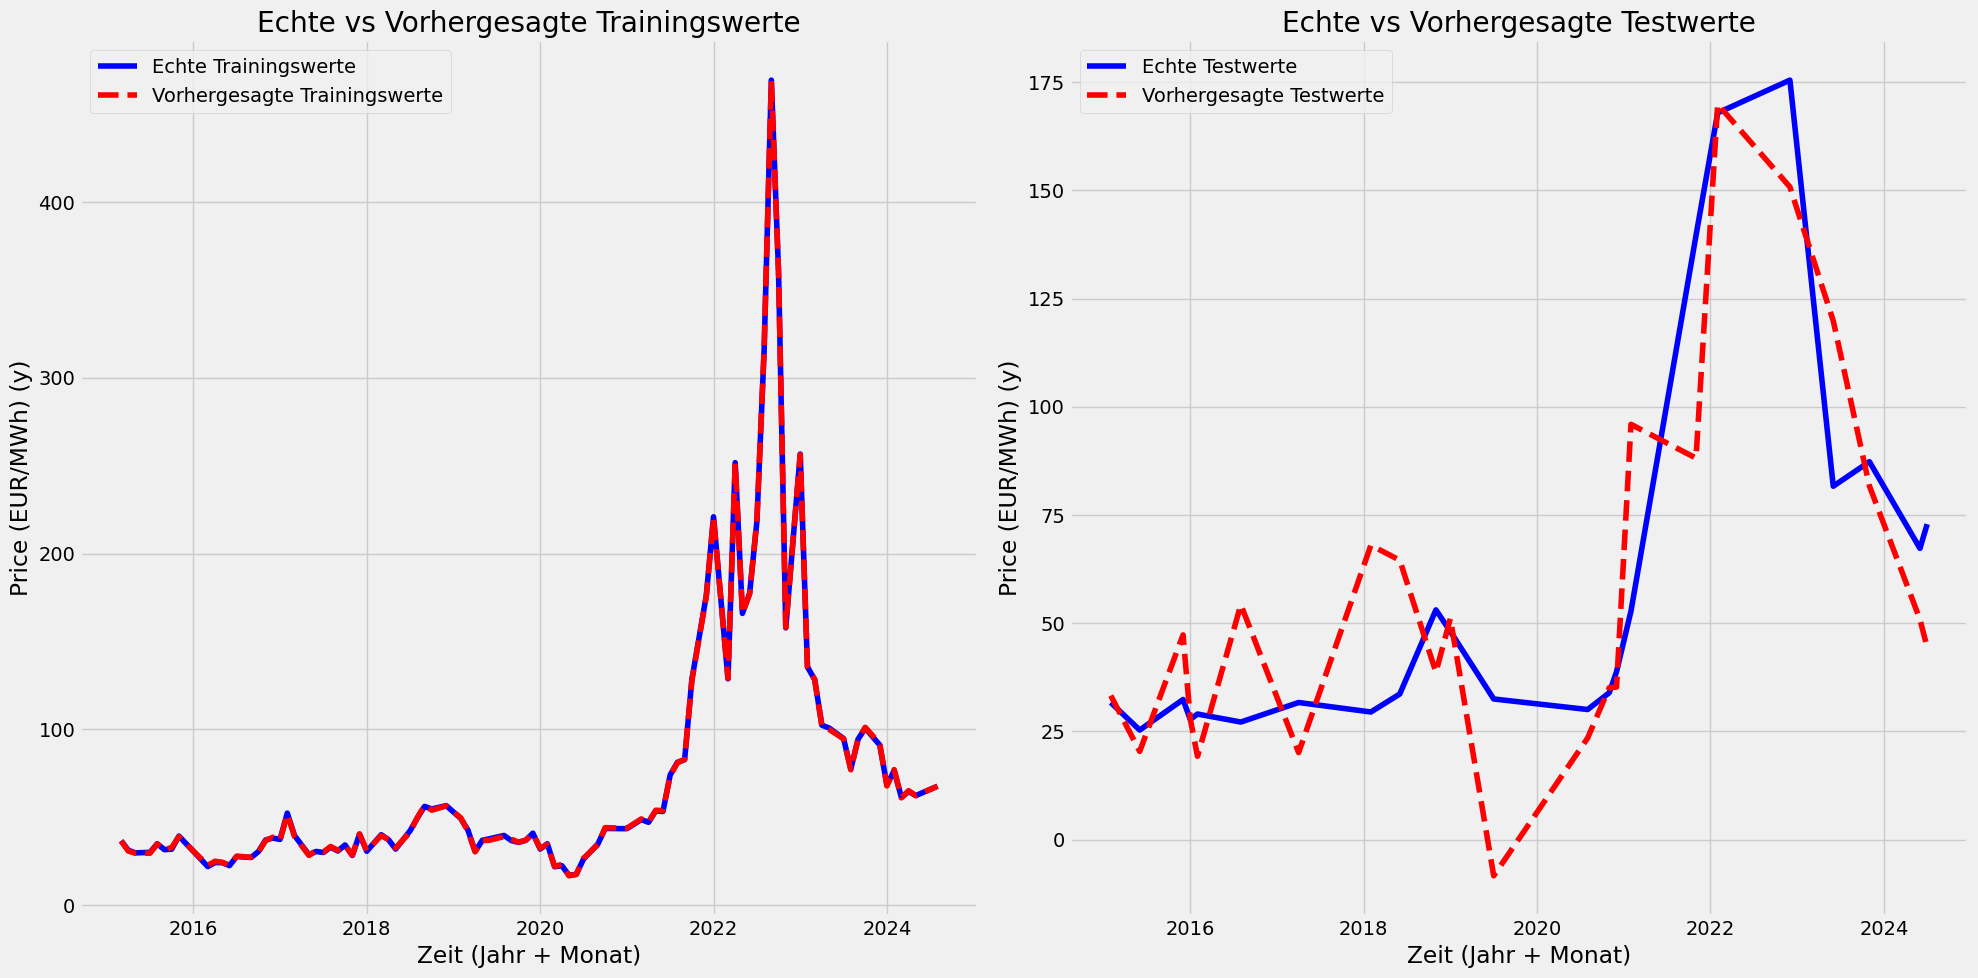

In [30]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}

random_search = RandomizedSearchCV(estimator=GradientBoostingRegressor(),
                                   param_distributions=param_dist, 
                                   n_iter=100, cv=3, n_jobs=-1, verbose=2)
random_search.fit(X_train, y_train)

print("Beste Hyperparameter: ", random_search.best_params_)

# Sortiere die Daten nach Zeit für eine saubere Linienzeichnung
def sort_data(df):
    return df.sort_values(by=['year', 'month'])

train_sorted = sort_data(pd.DataFrame({
    'year': X_train['year'],
    'month': X_train['month'],
    'y_value': y_train,
    'preds': random_search.predict(X_train)
}))

test_sorted = sort_data(pd.DataFrame({
    'year': X_test['year'],
    'month': X_test['month'],
    'y_value': y_test,
    'preds': random_search.predict(X_test)
}))

# Plot the results
plt.figure(figsize=(20, 10))

# Plot for training data
plt.subplot(1, 2, 1)
plt.plot(train_sorted['year'] + train_sorted['month']/12, train_sorted ['y_value'], label='Echte Trainingswerte', color='blue')
plt.plot(train_sorted['year'] + train_sorted['month']/12, train_sorted ['preds'], label='Vorhergesagte Trainingswerte', linestyle='--', color='red')
plt.xlabel('Zeit (Jahr + Monat)')
plt.ylabel('Price (EUR/MWh) (y)')
plt.title('Echte vs Vorhergesagte Trainingswerte')
plt.legend()
plt.grid(True)

# Plot for test data
plt.subplot(1, 2, 2)
plt.plot(test_sorted['year'] + test_sorted['month']/12, test_sorted['y_value'], label='Echte Testwerte', color='blue')
plt.plot(test_sorted['year'] + test_sorted['month']/12, test_sorted['preds'], label='Vorhergesagte Testwerte', linestyle='--', color='red')
plt.xlabel('Zeit (Jahr + Monat)')
plt.ylabel('Price (EUR/MWh) (y)')
plt.title('Echte vs Vorhergesagte Testwerte')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()




# Anwendung des standard Scaler 

In [31]:
from sklearn.preprocessing import StandardScaler
## Extras
# from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = GradientBoostingRegressor()
model.fit(X_train_scaled, y_train)

# Modellgüte anzeigen
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = model.score(X_train_scaled, y_train)
r2_test = model.score(X_test_scaled, y_test)

print(f'Mean Squared Error (Trainingsdaten): {mse_train}')
print(f'Mean Squared Error (Testdaten): {mse_test}')
print(f'R-Quadrat (Trainingsdaten): {r2_train}')
print(f'R-Quadrat (Testdaten): {r2_test}')

Mean Squared Error (Trainingsdaten): 7.985860631973901
Mean Squared Error (Testdaten): 246.19799294214204
R-Quadrat (Trainingsdaten): 0.998666846137413
R-Quadrat (Testdaten): 0.8712264339004315


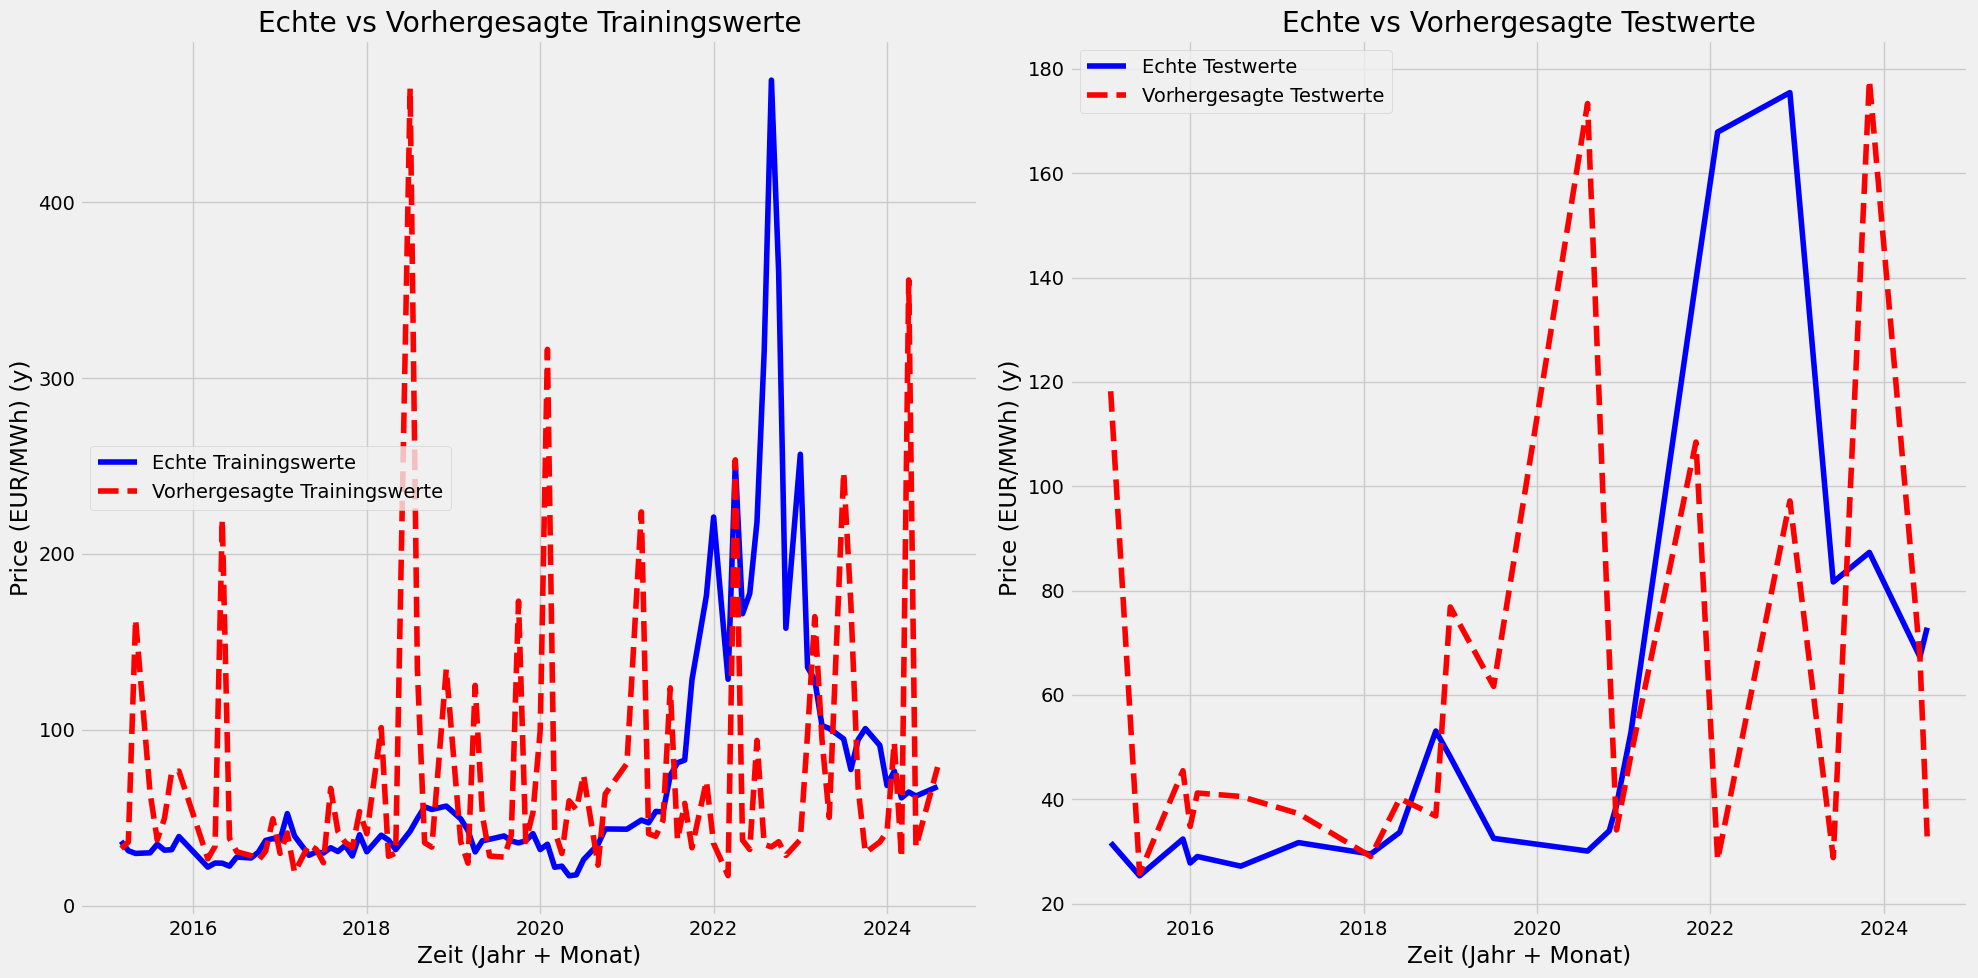

In [32]:
# Plot the results
plt.figure(figsize=(20, 10))

# Plot for training data
plt.subplot(1, 2, 1)
plt.plot(train_sorted['year'] + train_sorted['month']/12, train_sorted['y_value'], label='Echte Trainingswerte', color='blue')
plt.plot(train_sorted['year'] + train_sorted['month']/12, y_pred_train, label='Vorhergesagte Trainingswerte', linestyle='--', color='red')
plt.xlabel('Zeit (Jahr + Monat)')
plt.ylabel('Price (EUR/MWh) (y)')
plt.title('Echte vs Vorhergesagte Trainingswerte')
plt.legend()
plt.grid(True)

# Plot for test data
plt.subplot(1, 2, 2)
plt.plot(test_sorted['year'] + test_sorted['month']/12, test_sorted['y_value'], label='Echte Testwerte', color='blue')
plt.plot(test_sorted['year'] + test_sorted['month']/12, y_pred_test, label='Vorhergesagte Testwerte', linestyle='--', color='red')
plt.xlabel('Zeit (Jahr + Monat)')
plt.ylabel('Price (EUR/MWh) (y)')
plt.title('Echte vs Vorhergesagte Testwerte')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Cross-Validation 

In [33]:
# dataframe
data = {
    'year': years,  # etc.
    'month': months,
    'FC_load': FC_load,
    'ACT_load': ACT_load,
    'Solar_generation': Solar_generation,
    'Sonnenstunden': Sonnenstunden,
    'FC_Solar_generation': FC_Solar_generation,
    'FC_Rest': FC_Rest,
    'y_value': Durchschnittspreise  # Zielwerte
}

prices_df = pd.DataFrame(data)

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
# Features und Zielvariable
X = prices_df[['year', 'month', 'FC_load', 'ACT_load', 'Solar_generation', 'Sonnenstunden', 'FC_Solar_generation', 'FC_Rest']]
y = prices_df['y_value']

# Aufteilen der Daten in Trainings- und Testdatensätze
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Erstellen des Gradient Boosting Modells
model = GradientBoostingRegressor()


# beste Parameter aus dem Hyperparameter Search
params = {
    'objective': 'reg:squarederror',  # Für Regression
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'min_samples_leaf': 4, 
    'min_samples_split': 10
}

In [36]:
from sklearn.model_selection import train_test_split, cross_val_score

In [37]:
scores = cross_val_score(GradientBoostingRegressor(), X_train, y_train, cv=5)
print("Durchschnittliche Cross-Validation-Punktzahl: ", scores.mean())

Durchschnittliche Cross-Validation-Punktzahl:  0.33223502795928245


In [38]:
#Cross-Validation 
cv_scores_mse = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_r2 = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

# Cross-Validation-Ergebnisse
print(f"Durchschnittliches CV-MSE: {-np.mean(cv_scores_mse)}")
print(f"Durchschnittliches CV-R²: {np.mean(cv_scores_r2)}")

# Trainieren des Modells
model.fit(X_train, y_train)

# Vorhersagen für Trainings- und Testdaten
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

Durchschnittliches CV-MSE: 3730.585369409329
Durchschnittliches CV-R²: 0.39017205986745723


Visualisieren 

In [39]:
# Testdaten Plotten
test_data = X_test.copy()
test_data['y_value'] = y_test.values
test_data['preds'] = test_preds

In [40]:
# Plot
def sort_data3(df):
    return df.sort_values(by=['year', 'month'])

train_sorted3 = sort_data3(pd.DataFrame({
    'year': X_train['year'].values,
    'month': X_train['month'].values,
    'y_value': y_train.values,
    'preds': y_pred_train
}))

test_sorted3 = sort_data3(pd.DataFrame({
    'year': X_test['year'].values,
    'month': X_test['month'].values,
    'y_value': y_test.values,
    'preds': y_pred_test
}))

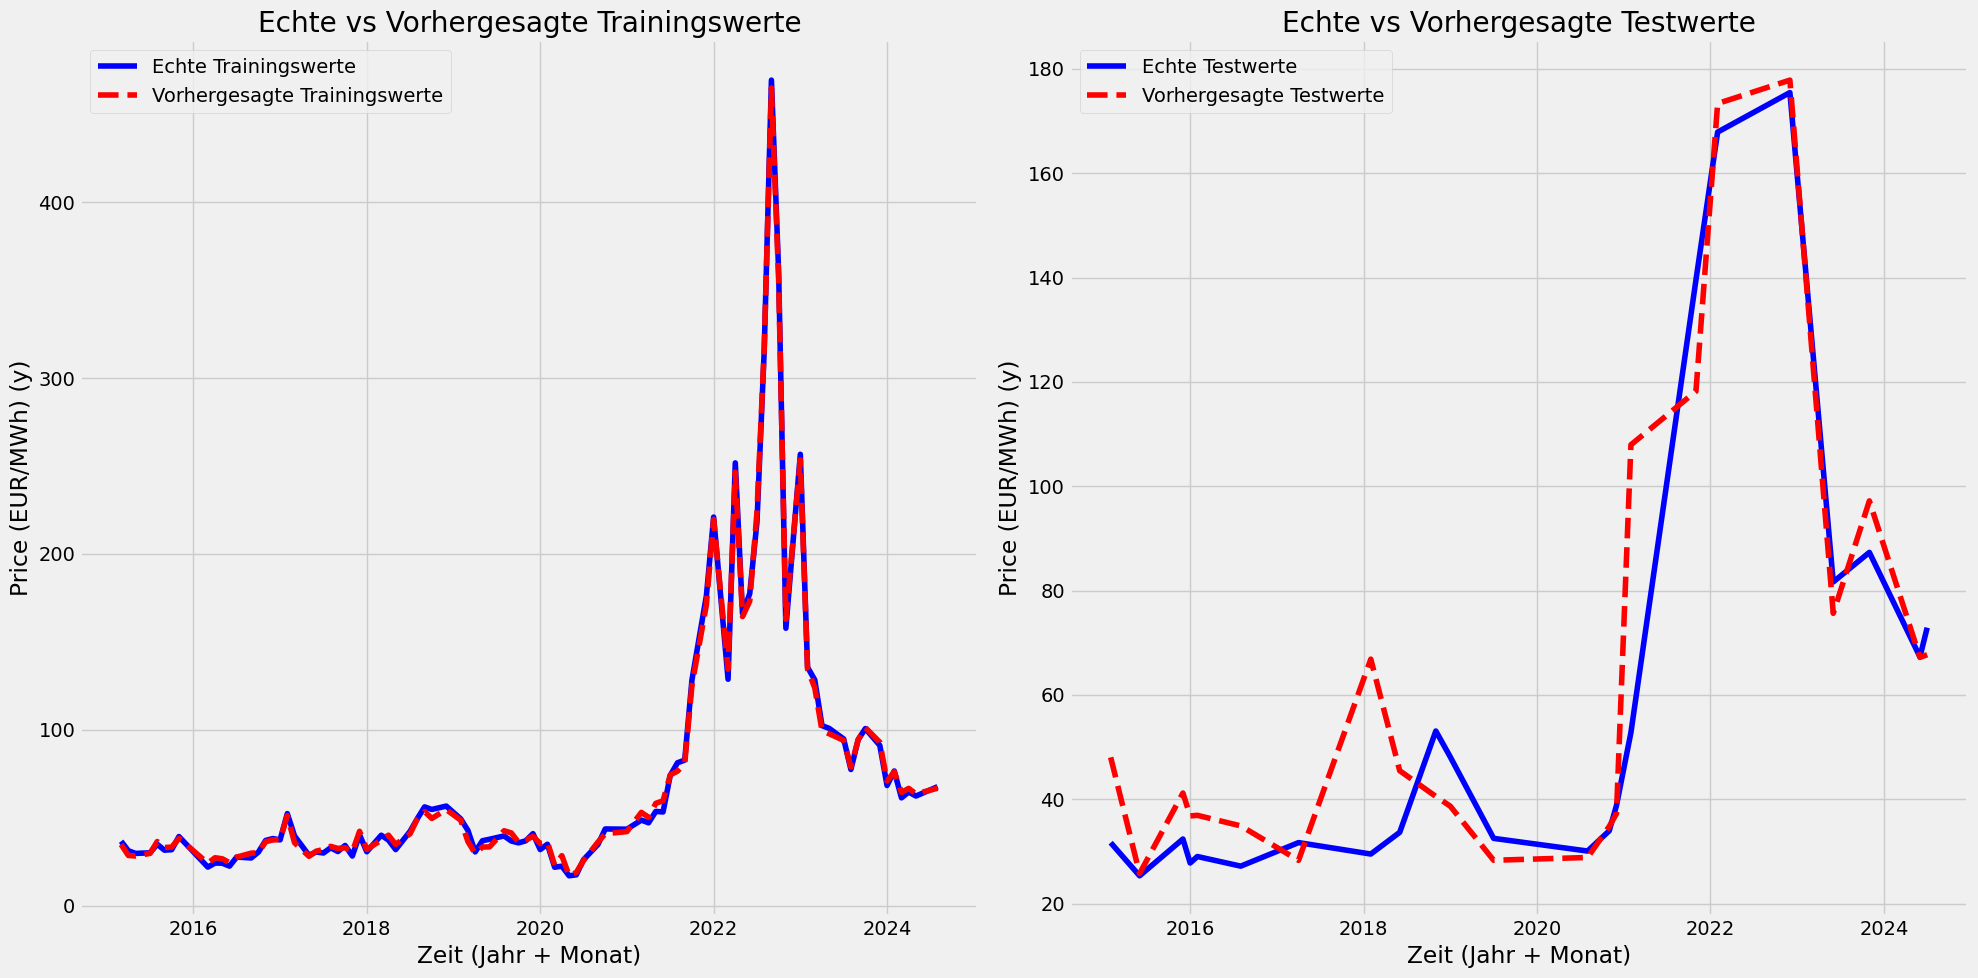

Mean Squared Error auf Trainingsdaten: 88.47869553325819
R²-Wert auf Trainingsdaten: 0.998666846137413
Mean Squared Error auf Testdaten: 314.85287863653804
R²-Wert auf Testdaten: 0.8622780558825797


In [41]:
plt.figure(figsize=(20, 10))
# Trainingsdaten plotten
plt.subplot(1, 2, 1)
plt.plot(train_sorted3['year'] + train_sorted3['month']/12, train_sorted3['y_value'], label='Echte Trainingswerte', color='blue')
plt.plot(train_sorted3['year'] + train_sorted3['month']/12, train_sorted3['preds'], label='Vorhergesagte Trainingswerte', linestyle='--', color='red')
plt.xlabel('Zeit (Jahr + Monat)')
plt.ylabel('Price (EUR/MWh) (y)')
plt.title('Echte vs Vorhergesagte Trainingswerte')
plt.legend()
plt.grid(True)

# Testdaten plotten
plt.subplot(1, 2, 2)
plt.plot(test_sorted3['year'] + test_sorted3['month']/12, test_sorted3['y_value'], label='Echte Testwerte', color='blue')
plt.plot(test_sorted3['year'] + test_sorted3['month']/12, test_sorted3['preds'], label='Vorhergesagte Testwerte', linestyle='--', color='red')
plt.xlabel('Zeit (Jahr + Monat)')
plt.ylabel('Price (EUR/MWh) (y)')
plt.title('Echte vs Vorhergesagte Testwerte')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Berechnen und Ausgeben des Mean Squared Error und R²-Werts für Test- und Trainingsdaten
mse_train = mean_squared_error(y_train, train_preds)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, test_preds)
r2_test = r2_score(y_test, y_pred_test)

print(f"Mean Squared Error auf Trainingsdaten: {mse_train}")
print(f"R²-Wert auf Trainingsdaten: {r2_train}")

print(f"Mean Squared Error auf Testdaten: {mse_test}")
print(f"R²-Wert auf Testdaten: {r2_test}")

MSE bei Testdaten hoch, Hinweis auf die abhängigkeit der Ergebnisse basierend auf den Ausreißern und ob diese in den Testdaten einbezogen werden 

# Deskriptive Statistik
Korrelation der Variablen 

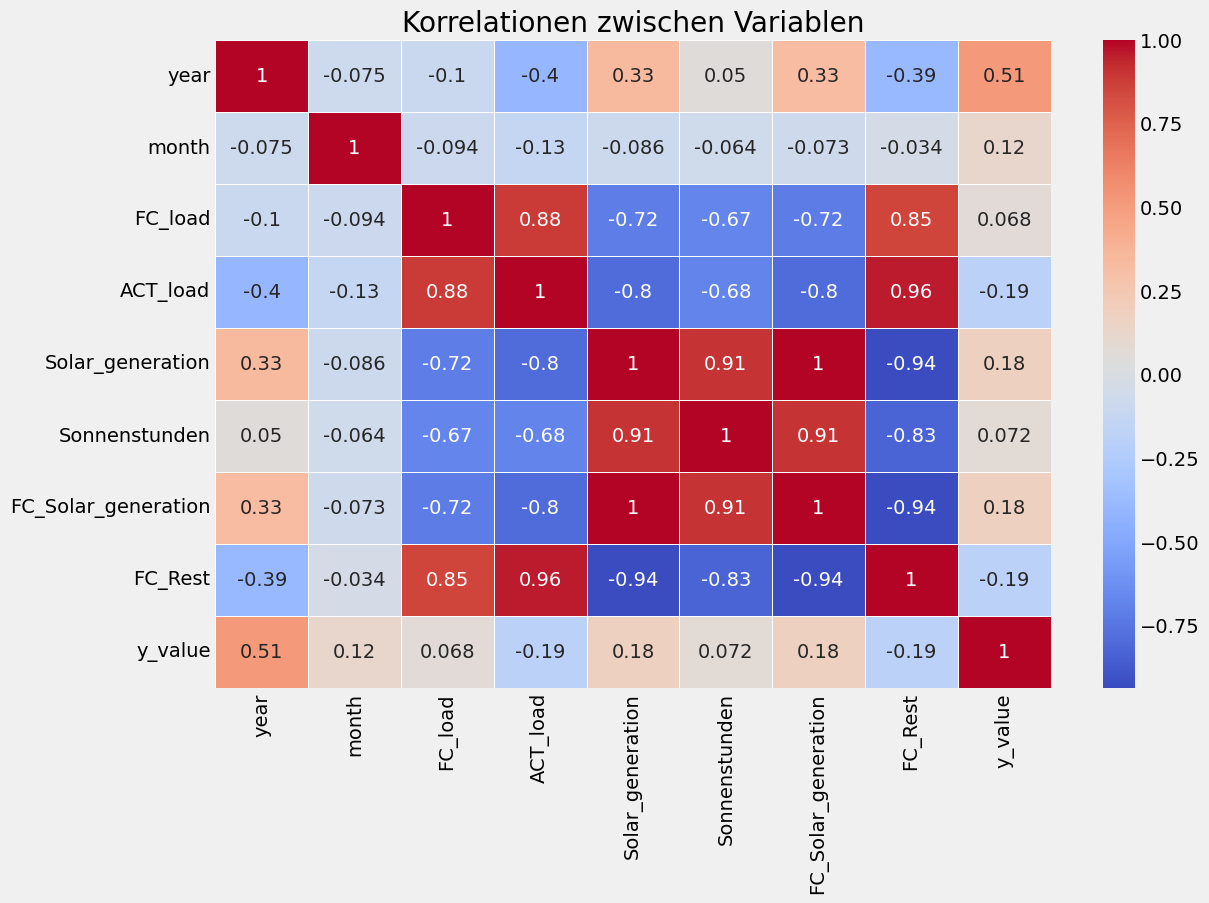

In [42]:
## Variablen untereinander 
# Korrelationen berechnen
correlation_matrix = prices_df.corr()

# Heatmap erstellen
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korrelationen zwischen Variablen')
plt.show()


In [43]:
from sklearn.inspection import PartialDependenceDisplay

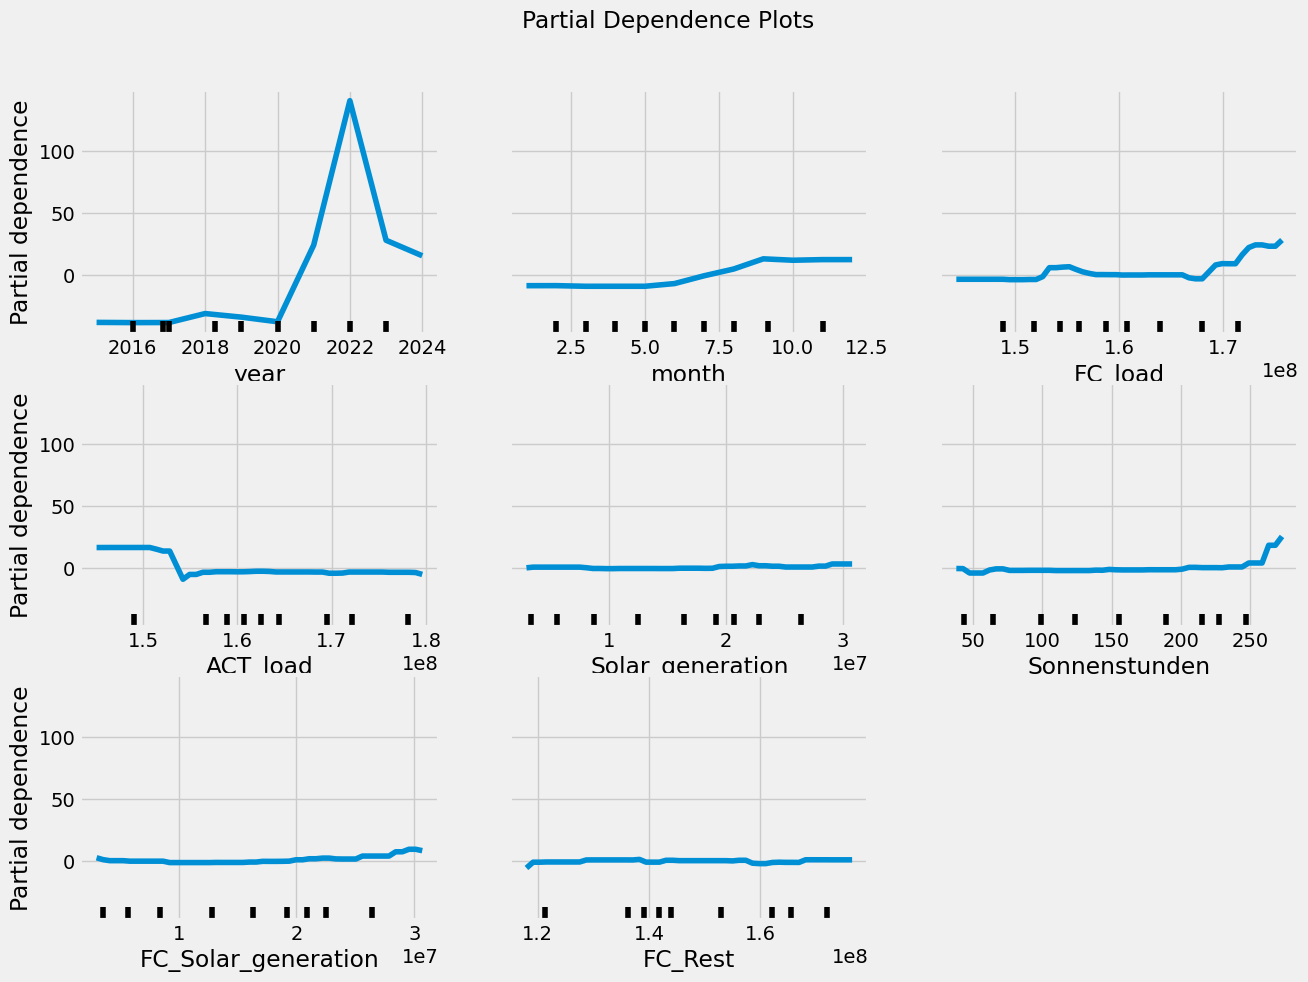

In [44]:
# Partial Dependence Plots erstellen
features = ['year', 'month', 'FC_load', 'ACT_load', 'Solar_generation', 'Sonnenstunden', 'FC_Solar_generation', 'FC_Rest']
fig, ax = plt.subplots(figsize=(14, 10))
PartialDependenceDisplay.from_estimator(model, X_train, features, ax=ax, grid_resolution=50)
plt.suptitle('Partial Dependence Plots')
plt.subplots_adjust(top=0.9)  # Platz für den Titel schaffen
plt.show()

anahand der Graphen ist erkennbar, dass besonders das Jahr einen großen Einfluss hat. Gerade ab 2022 sieht man hier einen Ausschlag. Deshalb wird im Folgenden eine Dummy Variable erstellt

# Gradientboosting Modell mit Dummy Variable 

In [45]:
# Dummy-Variable für 2022 bis 2023 hinzufügen
prices_df['dummy_2022_2023'] = np.where((prices_df['year'] >= 2021) & (prices_df['year'] <= 2022), 1, 0)

# X und y definieren
X = prices_df[['year', 'month', 'FC_load', 'ACT_load', 'Solar_generation', 'Sonnenstunden', 'FC_Solar_generation', 'FC_Rest', 'dummy_2022_2023']]
y = prices_df['y_value']
feature_names = ['year', 'month', 'FC_load', 'ACT_load', 'Solar_generation', 'Sonnenstunden', 'FC_Solar_generation', 'FC_Rest', 'dummy_2022_2023']


# Daten skalieren
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_names)

# Daten aufteilen in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# GradientBoostingRegressor Modell erstellen
model = GradientBoostingRegressor(max_depth=4, learning_rate=0.1, n_estimators=100)

# Cross-Validation (5-fache CV)
cv_scores_mse = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_r2 = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

# Cross-Validation-Ergebnisse
print(f"Durchschnittliches CV-MSE: {-np.mean(cv_scores_mse)}")
print(f"Durchschnittliches CV-R²: {np.mean(cv_scores_r2)}")

# Modell auf Trainingsdaten fitten
model.fit(X_train, y_train)

# Vorhersagen für Trainings- und Testdaten
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

Durchschnittliches CV-MSE: 4561.213692836315
Durchschnittliches CV-R²: 0.053013860245028986


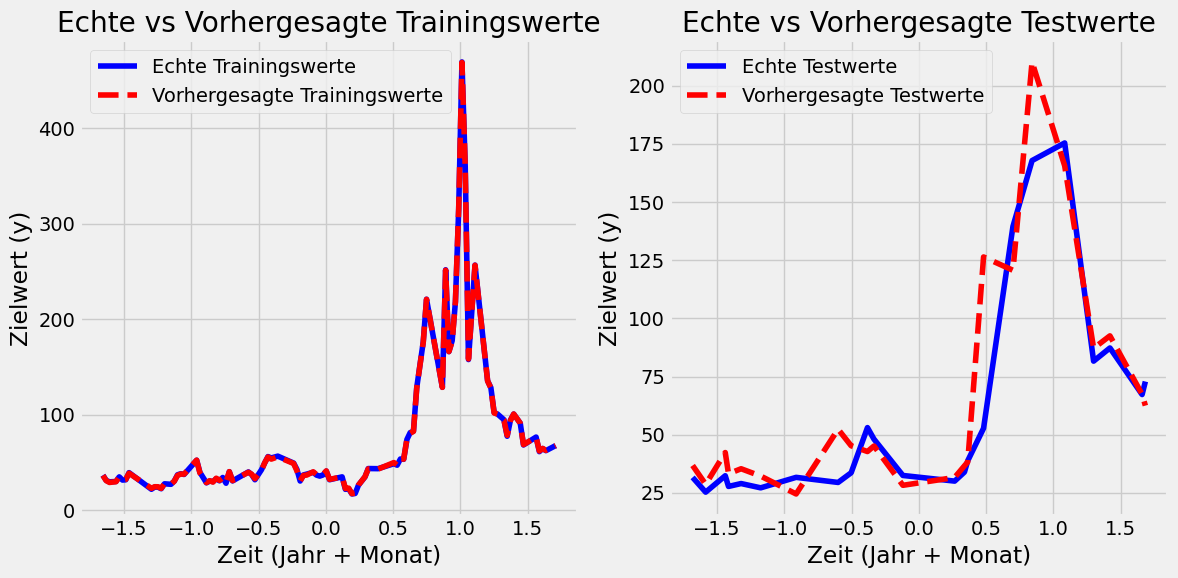

In [46]:
# Testdaten Plotten
test_data = pd.DataFrame(X_test, columns=['year', 'month', 'FC_load', 'ACT_load', 'Solar_generation', 'Sonnenstunden', 'FC_Solar_generation', 'FC_Rest', 'dummy_2022_2023'])
test_data['y_value'] = y_test.values
test_data['preds'] = test_preds

# Sortiere die Daten nach Zeit für eine saubere Linienzeichnung
def sort_data(df):
    return df.sort_values(by=['year', 'month'])

train_sorted = sort_data(pd.DataFrame({
    'year': X_train[:, 0],  # 'year' befindet sich an der ersten Stelle nach Skalierung
    'month': X_train[:, 1],  # 'month' befindet sich an der zweiten Stelle nach Skalierung
    'y_value': y_train,
    'preds': train_preds
}))

test_sorted = sort_data(pd.DataFrame({
    'year': X_test[:, 0],  # 'year' nach Skalierung
    'month': X_test[:, 1],  # 'month' nach Skalierung
    'y_value': y_test,
    'preds': test_preds
}))

# Plotten der echten Werte und Vorhersagen für Trainings- und Testdaten
plt.figure(figsize=(12, 6))

# Trainingsdaten plotten
plt.subplot(1, 2, 1)
plt.plot(train_sorted['year'] + train_sorted['month']/12, train_sorted['y_value'], label='Echte Trainingswerte', color='blue')
plt.plot(train_sorted['year'] + train_sorted['month']/12, train_sorted['preds'], label='Vorhergesagte Trainingswerte', linestyle='--', color='red')
plt.xlabel('Zeit (Jahr + Monat)')
plt.ylabel('Zielwert (y)')
plt.title('Echte vs Vorhergesagte Trainingswerte')
plt.legend()
plt.grid(True)

# Testdaten plotten
plt.subplot(1, 2, 2)
plt.plot(test_sorted['year'] + test_sorted['month']/12, test_sorted['y_value'], label='Echte Testwerte', color='blue')
plt.plot(test_sorted['year'] + test_sorted['month']/12, test_sorted['preds'], label='Vorhergesagte Testwerte', linestyle='--', color='red')
plt.xlabel('Zeit (Jahr + Monat)')
plt.ylabel('Zielwert (y)')
plt.title('Echte vs Vorhergesagte Testwerte')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [47]:
# Berechnen und Ausgeben des Mean Squared Error und R²-Werts für Test- und Trainingsdaten
mse_train = mean_squared_error(y_train, train_preds)
r2_train = r2_score(y_train, train_preds)

mse_test = mean_squared_error(y_test, test_preds)
r2_test = r2_score(y_test, test_preds)

print(f"Mean Squared Error auf Trainingsdaten: {mse_train}")
print(f"R²-Wert auf Trainingsdaten: {r2_train}")

print(f"Mean Squared Error auf Testdaten: {mse_test}")
print(f"R²-Wert auf Testdaten: {r2_test}")

Mean Squared Error auf Trainingsdaten: 0.27168654432544004
R²-Wert auf Trainingsdaten: 0.9999546448425947
Mean Squared Error auf Testdaten: 387.97174399246654
R²-Wert auf Testdaten: 0.7970718427768834


In [48]:
# Testdaten Plotten - Dummy Variable hinzufügen

# Überprüfen, wie viele Spalten X_test hat
print(X_test.shape)  

# Erstelle ein neues DataFrame für die Testdaten mit den ursprünglichen, nicht skalierten Dummy-Daten
test_data = pd.DataFrame(X_test, columns=['year', 'month', 'data_FC_load', 'data_ACT_load', 'data_Solar_generation', 'data_Sonnenstunden', 'data_FC_Solar_generation', 'data_FC_Rest', 'neue_spalte_od_dummy'])  # Passe den Spaltennamen für die zusätzliche Spalte an

# Dummy-Daten aus dem ursprünglichen, nicht skalierten Datensatz hinzufügen
test_data['dummy_2022_2023'] = prices_df.loc[y_test.index, 'dummy_2022_2023'].values

# Füge die Zielwerte (y_test) und Vorhersagen (test_preds) hinzu
test_data['y_value'] = y_test.values
test_data['preds'] = test_preds

# Sortiere die Daten nach Jahr und Monat
def sort_data(df):
    return df.sort_values(by=['year', 'month'])

test_sorted = sort_data(test_data)

# Daten mit Dummy 1 (2022-2023)
dummy_1_data = test_sorted[test_sorted['dummy_2022_2023'] == 1]

# Daten mit Dummy 0 (andere Jahre)
dummy_0_data = test_sorted[test_sorted['dummy_2022_2023'] == 0]

(23, 9)


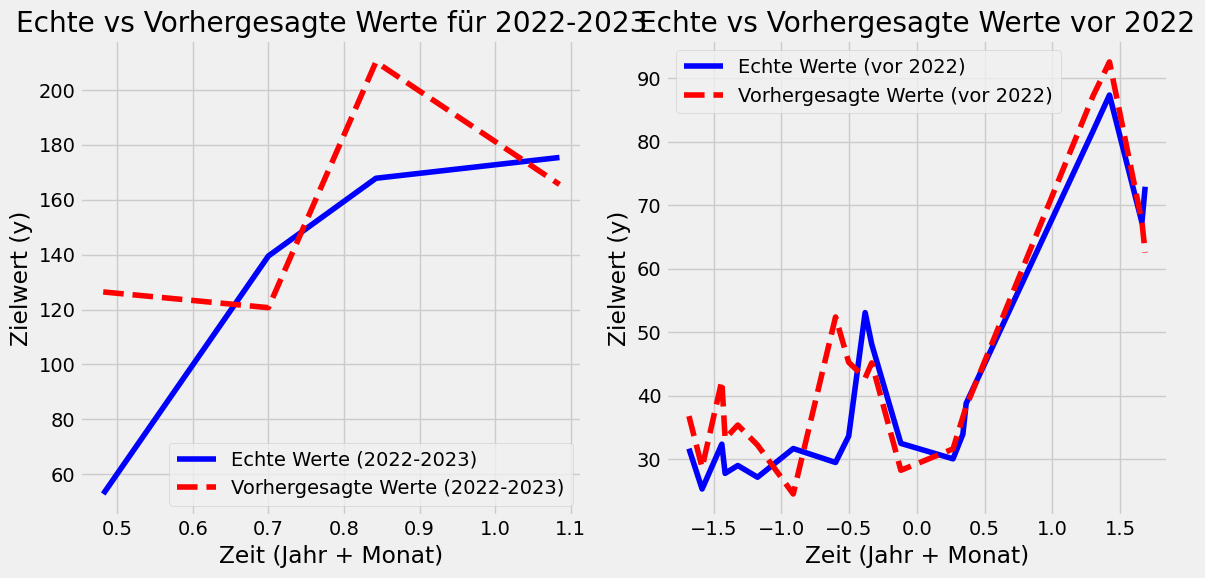

Mean Squared Error auf Trainingsdaten: 0.27168654432544004
R²-Wert auf Trainingsdaten: 0.9999546448425947
Mean Squared Error auf Testdaten: 387.97174399246654
R²-Wert auf Testdaten: 0.7970718427768834


In [49]:
# Plotten der Vorhersagen für Dummy 1 (2022-2023)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(dummy_1_data['year'] + dummy_1_data['month']/12, dummy_1_data['y_value'], label='Echte Werte (2022-2023)', color='blue')
plt.plot(dummy_1_data['year'] + dummy_1_data['month']/12, dummy_1_data['preds'], label='Vorhergesagte Werte (2022-2023)', linestyle='--', color='red')
plt.xlabel('Zeit (Jahr + Monat)')
plt.ylabel('Zielwert (y)')
plt.title('Echte vs Vorhergesagte Werte für 2022-2023')
plt.legend()
plt.grid(True)

# Plotten der Vorhersagen für Dummy 0 (vor 2022)
plt.subplot(1, 2, 2)
plt.plot(dummy_0_data['year'] + dummy_0_data['month']/12, dummy_0_data['y_value'], label='Echte Werte (vor 2022)', color='blue')
plt.plot(dummy_0_data['year'] + dummy_0_data['month']/12, dummy_0_data['preds'], label='Vorhergesagte Werte (vor 2022)', linestyle='--', color='red')
plt.xlabel('Zeit (Jahr + Monat)')
plt.ylabel('Zielwert (y)')
plt.title('Echte vs Vorhergesagte Werte vor 2022')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show() 
print(f"Mean Squared Error auf Trainingsdaten: {mse_train}")
print(f"R²-Wert auf Trainingsdaten: {r2_train}")

print(f"Mean Squared Error auf Testdaten: {mse_test}")
print(f"R²-Wert auf Testdaten: {r2_test}")

# Gradientboosting Modell mit GPRHC



In [50]:
data_komplett_2 = pd.read_csv("/workspaces/codespaces-jupyter/data/complete data (1).csv")
date_2 = data_komplett_2 ["Date"].to_numpy()
date_2 = pd.to_datetime(date, format='%B %Y').to_numpy()
FC_load_2 = data_komplett_2["Day-ahead Total Load Forecast [MW]"].to_numpy()
ACT_load_2 = data_komplett_2["Actual Total Load [MW]"].to_numpy()
Solar_generation_2 = data_komplett_2["Solar Generation (MW)"].to_numpy()
Sonnenstunden_2 = data_komplett_2["Solar hours (h)"].to_numpy()
FC_Solar_generation_2 = data_komplett_2 ["Solar Prognose (Day-Ahead D-1 18:00)"].to_numpy()
FC_Rest_2 = data_komplett_2 ["Solar_Prognose_diff"].to_numpy()
Durchschnittspreise_2 = data_komplett_2 ["Monthly_Avg_Price"].to_numpy()
GPRHC_DEU_2 = data_komplett_2["GPRHC_DEU"].to_numpy()
GPRHC_Russ_2 = data_komplett_2["GPRHC_RUS"].to_numpy()

In [51]:
# Shapes der Arrays drucken
print(f"FC_load_2 shape: {FC_load_2.shape}")
print(f"ACT_load_2 shape: {ACT_load_2.shape}")
print(f"Solar_generation_2 shape: {Solar_generation_2.shape}")
print(f"Sonnenstunden_2 shape: {Sonnenstunden_2.shape}")
print(f"FC_Solar_generation_2 shape: {FC_Solar_generation_2.shape}")
print(f"FC_Rest_2 shape: {FC_Rest_2.shape}")
print(f"Durchschnittspreise_2 shape: {Durchschnittspreise_2.shape}")

FC_load_2 shape: (115,)
ACT_load_2 shape: (115,)
Solar_generation_2 shape: (115,)
Sonnenstunden_2 shape: (115,)
FC_Solar_generation_2 shape: (115,)
FC_Rest_2 shape: (115,)
Durchschnittspreise_2 shape: (115,)


In [52]:
# Extrahiere Jahr und Monat
date_2 = pd.Series(date_2)
years_2 = date.dt.year.tolist()
months_2 = date.dt.month.tolist()


In [53]:
# Dataframe
data = {
    'year': years_2,  # etc.
    'month': months_2,
    'FC_load': FC_load_2,
    'ACT_load': ACT_load_2,
    'Solar_generation': Solar_generation_2,
    'Sonnenstunden': Sonnenstunden_2,
    'FC_Solar_generation': FC_Solar_generation_2,
    'FC_Rest': FC_Rest_2,
    'GPRHC_DEU': GPRHC_DEU_2,
    'GPRHC_Russ': GPRHC_Russ_2 , 
    'y_value': Durchschnittspreise  # Zielwerte
}

prices_df = pd.DataFrame(data)

# X und y
X = prices_df[['year', 'month', 'FC_load', 'ACT_load', 'Solar_generation', 'Sonnenstunden', 'FC_Solar_generation', 'FC_Rest', 'GPRHC_DEU', 'GPRHC_Russ']]
y = prices_df['y_value']

# Daten aufteilen in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
model= GradientBoostingRegressor()
params = {
    'objective': 'reg:squarederror',  # Für Regression
    'max_depth': 4,
    'learning_rate': 0.1
}

# Trainieren des Modells
model.fit(X_train, y_train)

# Vorhersagen für Trainings- und Testdaten
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

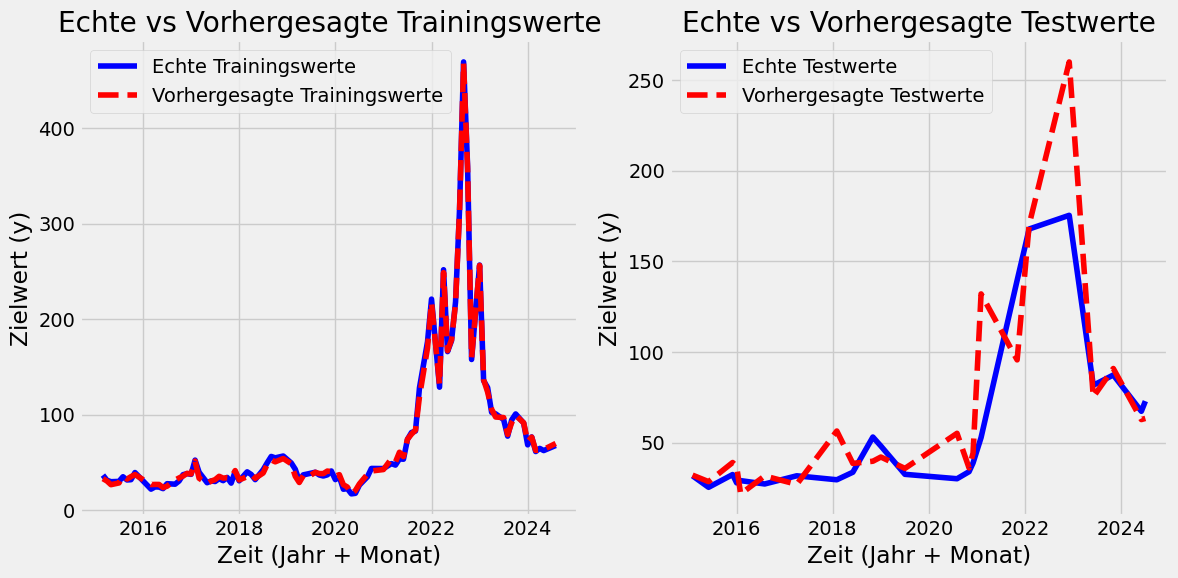

Mean Squared Error auf Trainingsdaten: 8.807062905732382
R²-Wert auf Trainingsdaten: 0.9985297552171378
Mean Squared Error auf Testdaten: 757.1168139493356
R²-Wert auf Testdaten: 0.6039909549176881


In [55]:
# Plot
def sort_data(df):
    return df.sort_values(by=['year', 'month'])

train_sorted = sort_data(pd.DataFrame({
    'year': X_train['year'],
    'month': X_train['month'],
    'y_value': y_train,
    'preds': y_pred_train
}))

test_sorted = sort_data(pd.DataFrame({
    'year': X_test['year'],
    'month': X_test['month'],
    'y_value': y_test,
    'preds': y_pred_test
}))

plt.figure(figsize=(12, 6))

# Trainingsdaten plotten
plt.subplot(1, 2, 1)
plt.plot(train_sorted['year'] + train_sorted['month']/12, train_sorted['y_value'], label='Echte Trainingswerte', color='blue')
plt.plot(train_sorted['year'] + train_sorted['month']/12, train_sorted['preds'], label='Vorhergesagte Trainingswerte', linestyle='--', color='red')
plt.xlabel('Zeit (Jahr + Monat)')
plt.ylabel('Zielwert (y)')
plt.title('Echte vs Vorhergesagte Trainingswerte')
plt.legend()
plt.grid(True)

# Testdaten plotten
plt.subplot(1, 2, 2)
plt.plot(test_sorted['year'] + test_sorted['month']/12, test_sorted['y_value'], label='Echte Testwerte', color='blue')
plt.plot(test_sorted['year'] + test_sorted['month']/12, test_sorted['preds'], label='Vorhergesagte Testwerte', linestyle='--', color='red')
plt.xlabel('Zeit (Jahr + Monat)')
plt.ylabel('Zielwert (y)')
plt.title('Echte vs Vorhergesagte Testwerte')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Berechnen und Ausgeben des Mean Squared Error und R²-Werts für Test- und Trainingsdaten
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Mean Squared Error auf Trainingsdaten: {mse_train}")
print(f"R²-Wert auf Trainingsdaten: {r2_train}")

print(f"Mean Squared Error auf Testdaten: {mse_test}")
print(f"R²-Wert auf Testdaten: {r2_test}")